In [162]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [163]:
def firstODE(t,y):
    return np.array([np.cos(t)*y + np.sin(2*t)])

In [164]:
# define ODE first order where f(t,y) = y'
def secondODE(t,y):
    w = 4*np.pi
    z = 0.06
    A = np.array([[0,1],
             [-w**2, -2*z*w]])
    return A@y

In [205]:
def lorenz(t,y):
    sigma = 10
    beta = 8/3 
    rho = 28
    dydt = np.array([
        sigma*(y[1] - y[0]),
        y[0]*(rho - y[2]) - y[1],
        y[0]*y[1] - beta*y[2]]
        )
    return dydt

In [ ]:
def RK4(func, t_init, t_end, y0, dt):
    
    t = np.linspace(t_init, t_end, int((t_end-t_init)/dt)+1)
        #creating a time-coordinate.
        #can also be done simpler as t = np.arange(t_init, t_end + dt, dt)
        #but chatgpt insists this is better.
    intv = len(t)

    y0 = np.atleast_1d(y0).astype(float)
    y = np.zeros((len(y0),intv), dtype = float)
        # no. rows is the number of states;
        # no. columns is the time series to be filled.
    y[:,0] = y0 #assigns the initial value of states.
    for i in range(intv - 1):
        k1 = func(t[i],  y[:,i])
        k2 = func(t[i] + dt/2, y[:,i] + dt*k1/2)
        k3 = func(t[i] + dt/2, y[:,i] + dt*k2/2)
        k4 = func(t[i] + dt,   y[:,i] + dt*k3)
        y[:,i+1] = y[:,i] + dt*(k1 + 2*k2 + 2*k3 + k4)/6
    return t, y 


Text(0.5, 0, 'z')

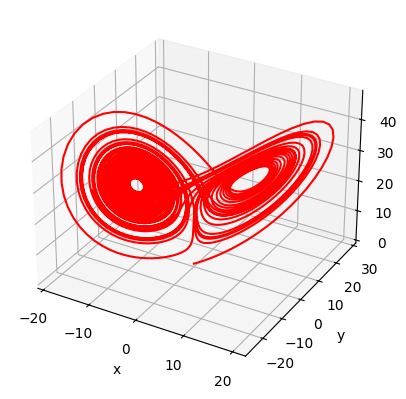

In [ ]:
sol = RK4(func = lorenz, t_init = 0, t_end = 50,
           y0 = [0,0.02,0], dt = 0.01)
time = sol[0]
x_traj = sol[1][0]
y_traj = sol[1][1]
z_traj = sol[1][2]
traj = plt.figure().add_subplot(projection = '3d')
traj.plot(x_traj,y_traj,z_traj, 'r')
traj.set_xlabel("x")
traj.set_ylabel("y")
traj.set_zlabel("z")